In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Temp = './TEMP/Resources/Temperature2.csv'
TempDf = pd.read_csv(Temp)

Pop = './POP/Resources/pop.csv'
PopDf = pd.read_csv(Pop)

PopDf.rename(columns={'Country Name':'Country', 'year':'Year'}, inplace=True)
TempDf.rename(columns={'Country Name':'Country', 'year':'Year'}, inplace=True)

In [3]:
PopDf.head()

,Country,Year,Indicator Code,Indicator Name,Country Code,POP
0,aruba,1960,SP.POP.GROW,Population growth (annual %),ABW,3.148037
1,afghanistan,1960,SP.POP.GROW,Population growth (annual %),AFG,1.816077
2,angola,1960,SP.POP.GROW,Population growth (annual %),AGO,1.903517
3,albania,1960,SP.POP.GROW,Population growth (annual %),ALB,3.015423
4,andorra,1960,SP.POP.GROW,Population growth (annual %),AND,7.050663


In [4]:
TempDf.head()

,Unnamed: 0,Country,Year,AverageTemperature,Standard Deviation
0,0,afghanistan,1960,15.051182,8.919992
1,1,afghanistan,1961,14.064917,9.684162
2,2,afghanistan,1962,13.768667,9.143732
3,3,afghanistan,1963,15.033417,8.857023
4,4,afghanistan,1964,13.084917,10.401564


In [5]:
TempPop = pd.merge(TempDf,PopDf,how='left', left_on=['Country','Year'],right_on=['Country','Year'])

In [6]:
TempPop.head()

,Unnamed: 0,Country,Year,AverageTemperature,Standard Deviation,Indicator Code,Indicator Name,Country Code,POP
0,0,afghanistan,1960,15.051182,8.919992,SP.POP.GROW,Population growth (annual %),AFG,1.816077
1,1,afghanistan,1961,14.064917,9.684162,SP.POP.GROW,Population growth (annual %),AFG,1.876528
2,2,afghanistan,1962,13.768667,9.143732,SP.POP.GROW,Population growth (annual %),AFG,1.934999
3,3,afghanistan,1963,15.033417,8.857023,SP.POP.GROW,Population growth (annual %),AFG,1.992521
4,4,afghanistan,1964,13.084917,10.401564,SP.POP.GROW,Population growth (annual %),AFG,2.049423


Please type the country you would like to analyze: mexico


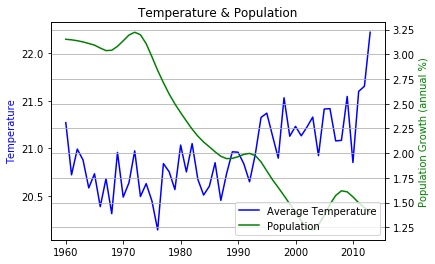

In [9]:
Country = input ("Please type the country you would like to analyze: ").lower()

CountryPlt = TempPop[TempPop['Country'] == Country]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

TempY, = ax1.plot(CountryPlt['Year'], CountryPlt['AverageTemperature'], color="blue", label="Average Temperature")
PopY, = ax2.plot(CountryPlt['Year'], CountryPlt['POP'], color="green",label='Population')

plt.title("Temperature & Population")
ax1.set_ylabel('Temperature', color='b')
ax2.set_ylabel('Population Growth (annual %)', color='green')
plt.grid(True)

plt.legend(handles=[TempY, PopY], loc="lower right")

plt.savefig("./Images/Temperature&Population.png")
plt.show()